<a href="https://colab.research.google.com/github/SaraDornetti/LSN/blob/main/Lezione11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

## Machine Learning
Nei programmi tradizionali il computer restituisce un output a partire da dati e programma inseriti dall'utente. Nel caso del Machine Learning (ML) la situazione cambia. Esistono diversi tipi di ML:

*   **supervised learning** l'utente fornisce i dati e l'output al computer, il quale si occupa di restituire un programma. Funziona bene per problemi di classificazione e per regressioni.
*   **unsupervised learning** l'utente fornisce i dati al computer, il quale si occupa di restituire sia l'output che il programma. È particolarmente utile per trovare associazioni e pattern non noti in un certo dataset.
*   **reinforcement learning** in questo caso l'agente impara attraverso l'interazione con l'ambiente -> ci sono premi nel caso di funzionamento corretto e panalità nel caso contrario.

Consideriamo un problema nel contesto del supervised machine learning. Ci servono tre ingredienti:


1.   **Dataset** $D(x,y)$ con $x$ variabile indipendente e $y$ variabile dipendente.
2.   **Modello** $f(x,p)$ in cui $f: x → y$ è una funzione del parametro $p$.
3. **Cost function** $C[y,f(x,p)]$.

Per dati continui la funzione di costo può essere il _mean square error_ :
$$
E(\vec{w})= \frac{1}{n}\sum_{i=1}^n |\vec{Y}_i-f(\vec{Y}_i,\vec{w})|^2
$$

oppure il _mean absolute error_:
$$
E(\vec{w})= \frac{1}{n}\sum_{i=1}^n |\vec{Y}_i-f(\vec{Y}_i,\vec{w})|
$$

Si divide il dataset in due parti: una dedicata al training $D_{train}$ (circa il $90\%$ dei dati) e una dedicata al test $D_{test}$ (circa il $10\%$ dei dati). L'obiettivo è trovare il parametro $p$ che minimizza la funzione di costo usando solo $D_{train}$: si minimizza $E_{in}=C[y_{train},f(x_{train},p)]$. Alla fine la performance del modello è valutata calcolando la funzione di costo con $D_{test}$: si ottiene dunque $E_{out}=C[y_{test},f(x_{test},p)]$. Bisogna confrontare $E_{in}$ ed $E_{out}$ (_cross validation procedure_). In generale $E_{in}<E_{out}$ perchè i dati di test non sono stati usati per il training. Tuttavia, all'aumentare del numero di punti nel dataset, i due errori tendono a convergere a un determinato valore che prende il nome di **bias**. Viene naturale descrivere $E_{out}$ come una somma tra bias e una varianza. Nei modelli che presentano una grande differenza tra errore di input e output ci sono problemi di _overfitting_ dei dati.

In un algoritmo di ML abbiamo bisogno di:
* **Representation**: landscape di tutti i possibili modelli.
* **Evaluation**: determina le preferenze sul landscape.
* **Optimization**: strategia per soddisfare le preferenze.

## Neural Networks
Le reti neurali (NNs) sono una delle tecniche di supervised learning più potenti e utilizzate. Si dividono in 4 categorie:

1. General purpose NNs.
2. NNs usate per processare immagini, e.g. Convolutional Neural Networks (CNNs).
3. NNs per sequential data, e,g, Recurrent Neural Networks (RNNs).
4. NNs per unsupervised learning.

Le reti neurali mimano il comportamento dei neuroni: se il segnale in ingresso supera una certa soglia, il neurone genera un segnale di output, che sarà un input per un altro neurone. Un tipo di neurone artificiale è il **percettrone**: un percettrone riceve diversi impulsi binari $x_1, x_2, \dots$ con un certo peso $w_1, w_2, \dots$ e produce un singolo output binario: se $\sum_jx_jw_j$ è minore di un certo valore di soglia $\rightarrow 0$, altrimenti $→ 1$. Il problema dei percettroni è che una piccola modifica ai pesi o al valore di soglia può causare un flip dell'output. Per questo diventa difficile fare modifiche graduali per raggiungere il risultato che si desidera. Per questo si introducono altri tipi di neuroni artificiali, come i **neuroni sigmoidi**, molto simili ai primi ma con la differenza che un piccolo cambiamento di soglia e pesi porti a un piccolo cambiamento di output. In questo caso l'output è dato dalla funzione sigmoide $\sigma(z)=\frac{1}{1+e^{-z}}$, $z=wx+w_0$ e $w_0$ il bias. Sono possibili altre **funzioni di attivazione** per i neuroni, che possono anche non saturare per grandi input.

L'idea alla base delle NNs è di disporre i neuroni in maniera gerarchica: avremo un input layer, dei layer nascosti (middle layer) e un output layer. E.g. dobbiamo decifrare quale cifra è scritta in un'immagine 28x28 greyscale. Si codificano le intensità dei pixel dell'immagine nei neuroni di input, quindi abbiamo bisogno di 28x28=784 neuroni. Poi abbiamo un middle layer con n neuroni, e infine un layer di output con 10 neuroni che rappresentano le cifre da 0 a 9. Il neurone con l'attivazione maggiore indica quale cifra c'era nell'immagine.

**Teo** _Universal approximation theorem_: una rete neurale con un singolo hidden layer può approssimare qualsiasi funzione continua, multi-input/multi-output, con precisione arbitraria.

Le reti neurali moderne contengono più middle layers. Aumentare il numero di layer corrisponde ad aumentare il numero di parametri e quindi il potere rappresentazionale della rete neurale. Sia il numero di neuroni per layer che di layer nascosti influenzano la performance di una rete neurale. Il numero di parametri deve essere abbastanza grande da prevenire l'underfitting, ma non troppo, per evitare l'overfitting.









### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
# 500 e 50 valori uniformemente distribuiti tra -1 e 1
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

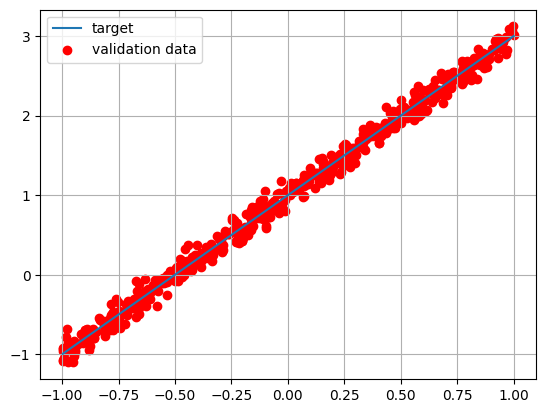

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# Si costruisce una rete neurale semplice (sequential), con layer completamente connessi (dense)
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
# un solo neurone ed un unico input: x
# la rete allena peso e bias, legati all'input da w*x + b : due come i parametri del problema

# compile the model choosing optimizer, loss and metrics objects
# optimizer = 'sgd' stochastic gradient descent per aggiornare i pesi
# loss = 'mse' l'errore quadratico medio come funzione costo
# metrics = ['mse']: la MSE viene usata anche come metrica da monitorare durante l'allenamento

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# Il codice esegue l'addestramento usando i dati di training
# L'addestramento è effettuato in batch di 32 esempi per volta
# Allenamento ripetuto per 50 epoche, ovvero 30 iterazioni sull'intero set di dati
# A ogni epoca, i dati di input vengono mescolati casualmente (shuffle=True) per migliorare la capacità di generalizzazione del modello e ridurre il rischio di overfitting locale.
# Durante il training, si monitora l’errore del modello su un set di validazione. Il modello non si allena sui dati di validazione, li usa solo per valutare come sta andando.
# Infine, i risultati dell’addestramento, come MSE su training e validazione per ogni epoca, vengono salvati all’interno dell’oggetto history.

history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9887 - mse: 1.9887 - val_loss: 0.2986 - val_mse: 0.2986
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2115 - mse: 0.2115 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.999111]], dtype=float32), array([0.99783945], dtype=float32)]

In [8]:
# evaluate model
# Si valuta il modello su dati che non ha mai visto durante l’allenamento
# Non si aggiornano i pesi, si calcolano solo loss e metriche.

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - mse: 0.0098 

Test loss: 0.009530873969197273
Test accuracy: 0.009530873969197273


In [9]:
# evaluate model with the exact curve
# Il modello è valutato anche sui dati target
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3162e-06 - mse: 3.3162e-06 

Test loss: 4.881020686298143e-06
Test accuracy: 4.881020686298143e-06


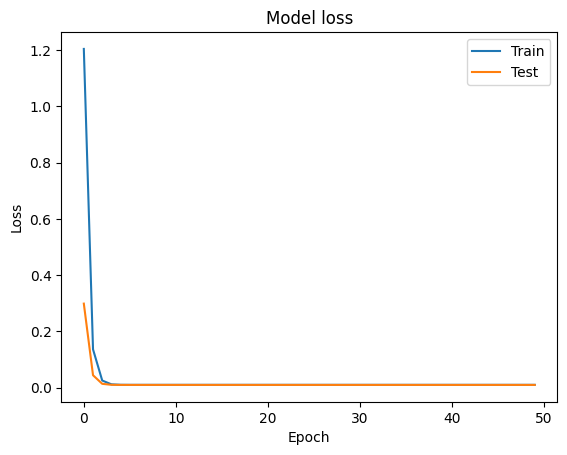

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


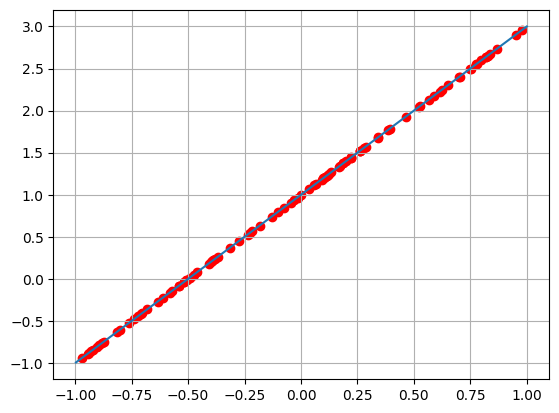

In [11]:
# Confronto tra funzione target e previsione del modello
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Nei grafici riportati sopra
- $N_{train}=5000$
- $N_{test}=500$
- $\sigma = 0.1$
- $N_{epochs}=70$
- **ottimizzatore** stochastic gradient descent sdg
- **cost function** mean square error mse

Cambiando i parametri con cui si allena la rete si osserva che:
1. Aumentando le epoche si ottiene una precisione maggiore perchè il modello riesce a ottimizzare meglio i propri pesi per ridurre l'errore sui dati di training. Per questo motivo, aumentando troppo il numero di epoche si rischia di avere overfitting.

2. Aumentare i dati di training è necessario per permettere alla rete di imparare da un dataset vario, idealmente con infiniti dati si arriva ad avere errore sui dati di test uguale all'errore sui dati di training. Nel caso riportato. Avere tanti dati è diventa rilevante quando $\sigma$ aumenta.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

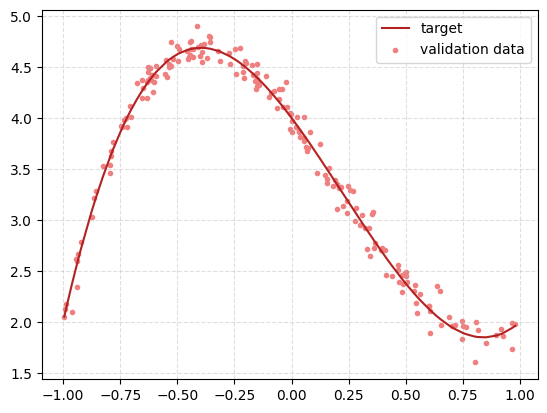

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# target parameters of f(x)
a, b, c, d = 3, -2, -3, 4

# COSTRUISCO IL DATASET D(x,y)
#genero le x uniformemente tra 0 e 1
x_train = np.random.uniform(-1, 1, 2000) #genero 500 dati di input per il training
x_valid = np.random.uniform(-1, 1, 200) #genero 50 dati per il test
x_valid.sort() #ordina il vettore in ordine crescente

#genero le y come f(x) + sigma
sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma)
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

# IL TARGET
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal target function

# PLOT DEI DATI VERI E DEL TARGET
plt.plot(x_valid, y_target, color='firebrick', label='target')
plt.scatter(x_valid, y_valid, marker='.', color='lightcoral', label='validation data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4893 - mse: 3.4893 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8099 - mse: 0.8099 - val_loss: 0.7460 - val_mse: 0.7460
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7505 - mse: 0.7505 - val_loss: 0.7014 - val_mse: 0.7014
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7089 - mse: 0.7089 - val_loss: 0.6541 - val_mse: 0.6541
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6543 - mse: 0.6543 - val_loss: 0.6200 - val_mse: 0.6200
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6410 - mse: 0.6410 - val_loss: 0.5984 - val_mse: 0.5984
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6171 - mse: 0.6171 - val_loss: 0.5856 - val_mse: 0.5856
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.5610 - val_mse: 0.5610
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.573

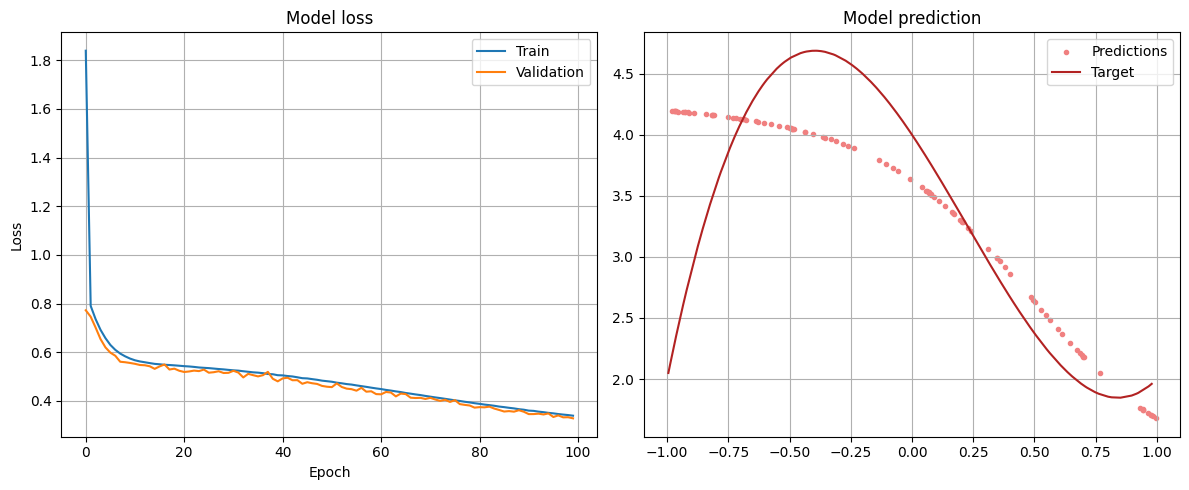

In [14]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(1,))) #input layer e middle layer con 10 neuroni. Prende in ingresso x (dim 1)
#model.add(Dense(10, activation='relu')) #hidden layer con 10 neuroni se voglio aggiungere altri layer nascosti
model.add(Dense(1))   # output layer restituisce y (dim 1)
# dense significa che il layer è completamente connesso

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #usa stochastic gradient descent come optimizer e mean square error come cost function
# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Primo grafico: training e validation loss ---
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'])
axes[0].grid(True)

# --- Secondo grafico: predizioni vs curva target ---
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted,  marker='.', color='lightcoral', label='Predictions')
axes[1].plot(x_valid, y_target, color='firebrick', label='Target')
axes[1].set_title('Model prediction')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


L’architettura del modello è composta da un layer denso (Dense) con $10$ neuroni e funzione di attivazione sigmoide, che riceve in ingresso un input monodimensionale (input_shape = (1,)), seguito da un layer di output denso con un singolo neurone e attivazione lineare. Tutti i layer del modello sono completamente connessi (fully connected).


Il modello è stato compilato utilizzando
- ottimizzatore: Stochastic Gradient Descent (SGD)
- funzione di costo: Mean Squared Error (MSE), utilizzata anche come metrica di valutazione.

L’addestramento del modello è stato effettuato utilizzando un dataset di training da $2000$ punti e un dataset di validazione da $200$. Il modello è stato allenato per $100$ epoche con batch size pari a $32$. I dati di input sono stati mescolati (shuffle) a ogni epoca per migliorare la stabilità dell’apprendimento.

Durante il training sono stati monitorati l’andamento della loss sul training set e sul validation set, i cui valori sono stati salvati nell’oggetto history. Al termine dell’addestramento, il modello è stato valutato confrontando le predizioni sia con i dati di validazione rumorosi sia con la curva target esatta. In entrambi i casi, le prestazioni sono state quantificate tramite la Mean Squared Error.


Il modello scelto è molto semplice e risulta in grado di apprendere soltanto l’andamento generale della funzione target.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 15)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 10.1833 - mse: 10.1833 - val_loss: 5.8484 - val_mse: 5.8484
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6255 - mse: 3.6255 - val_loss: 1.3833 - val_mse: 1.3833
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8944 - mse: 0.8944 - val_loss: 0.6153 - val_mse: 0.6153
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.4380 - val_mse: 0.4380
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3971 - mse: 0.3971 - val_loss: 0.3865 - val_mse: 0.3865
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3477 - mse: 0.3477 - val_loss: 0.3612 - val_mse: 0.3612
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3258 - mse: 0.3258 - val_loss: 0.3394 - val_mse: 0.3394
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3299 - mse: 0.3299 - val_loss: 0.3172 - val_mse: 0.3172
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


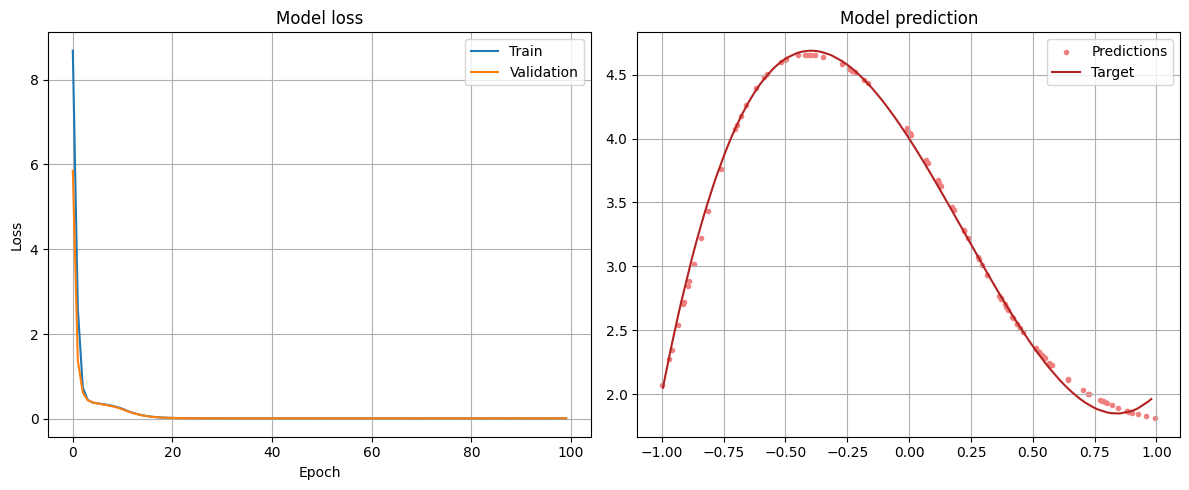

In [15]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(15, activation='tanh', input_shape=(1,))) #input layer e middle layer con 10 neuroni. Prende in ingresso x (dim 1)
model.add(Dense(10, activation='tanh')) #hidden layer con 10 neuroni se voglio aggiungere altri layer nascosti
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))   # output layer restituisce y (dim 1)
# dense significa che il layer è completamente connesso

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse']) #usa stochastic gradient descent come optimizer e mean square error come cost function
# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Primo grafico: training e validation loss ---
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'])
axes[0].grid(True)

# --- Secondo grafico: predizioni vs curva target ---
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted,  marker='.', color='lightcoral', label='Predictions')
axes[1].plot(x_valid, y_target, color='firebrick', label='Target')
axes[1].set_title('Model prediction')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In questo secondo esempio l'architettura è più complessa. In particolare, il modello include un primo layer denso con 15 neuroni e funzione di attivazione tangente iperbolica (tanh), che riceve in ingresso un input monodimensionale (input_shape = (1,)). Seguono due hidden layer aggiuntivi, rispettivamente con 10 e 5 neuroni, entrambi con funzione di attivazione tanh. Il layer di output è costituito da un singolo neurone con attivazione lineare, che restituisce l’output scalare y.


Il modello è stato compilato utilizzando
- ottimizzatore: Adam
- funzione di costo: Mean Squared Error (MSE), utilizzata anche come metrica di valutazione.

Il dataset utilizzato è lo stesso del caso precedente. Il modello è stato allenato per $100$ epoche con batch size pari a $32$.


L’aumento della profondità della rete, insieme all’uso della funzione di attivazione tanh e dell’ottimizzatore Adam, consente al modello di catturare strutture più complesse della funzione target. Si osserva che c'è una minore precisione ai bordi dell'intervallo.

Questo è legato al fatto che la rete si allena solo sui dati di training, quindi non ha modo di prevedere l'andamento della funzione fuori dall'intervallo scelto. Di conseguenza anche ai bordi si osserva una minore capacità di apprendimento.



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


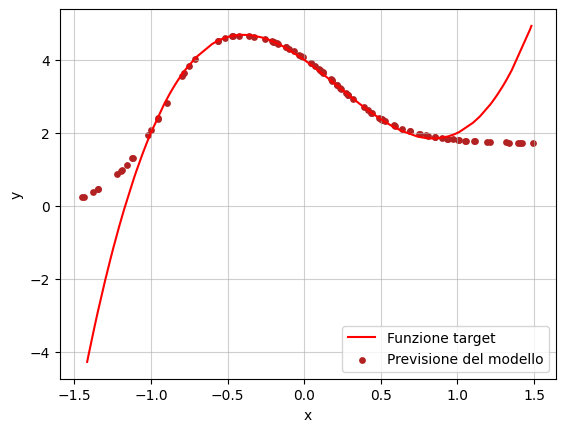

In [17]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_valid=np.random.uniform(-1.5,1.5,100)
x_valid.sort()
y_target=a * x_valid**3 + b * x_valid**2 + c * x_valid + d
y_predicted = model.predict(x_predicted)
plt.plot(x_valid, y_target, color='red', label='Funzione target')
plt.scatter(x_predicted, y_predicted, color='firebrick', label='Previsione del modello',  marker='o', s=15)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

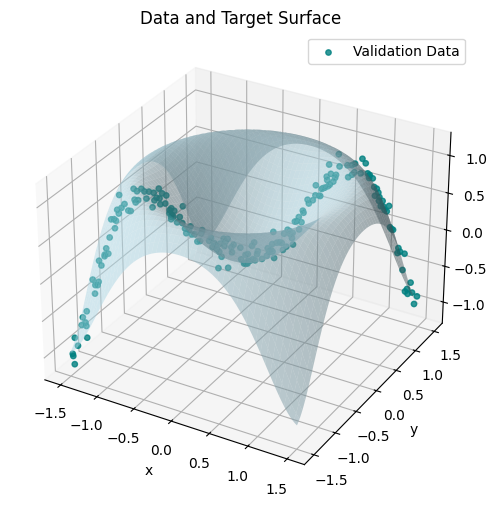

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# COSTRUISCO IL DATASET D(x,y)
#genero le x uniformemente tra 0 e 1
x_train = np.random.uniform(-3/2, 3/2, 2000)
y_train = np.random.uniform(-3/2, 3/2, 2000)
x_valid = np.random.uniform(-3/2, 3/2, 200)
y_valid = np.random.uniform(-3/2, 3/2, 200)
x_valid.sort() #ordina il vettore in ordine crescente
y_valid.sort() #ordina il vettore in ordine crescente

#genero le y come f(x) + sigma
sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

# IL TARGET
z_target = np.sin(x_valid**2+y_valid**2) # ideal target function

# Creiamo una griglia regolare dove calcolare la superficie
X = np.linspace(-1.5, 1.5, 200)
Y = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(X, Y)

Z = np.sin(X**2 + Y**2)

# PLOT DEI DATI VERI E DEL TARGET
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# superficie
ax.plot_surface(X, Y, Z, color='lightblue', edgecolor='none', alpha=0.5)

# scatter dei dati
ax.scatter(x_valid, y_valid, z_valid, color='teal', s=15, alpha=0.8, label='Validation Data')

ax.set_title("Data and Target Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()

plt.show()


È stato costruito un dataset bidimensionale $(x,y)$ campionando uniformemente entrambe le variabili nell’intervallo $[−3/2,3/2]$. Sono stati generati $2000$ punti per il training set e $200$ punti per il validation set. Il rumore aggiunto è $\sigma=0.1$.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.4102 - mse: 0.4102 - val_loss: 0.3583 - val_mse: 0.3583
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.3425 - val_mse: 0.3425
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1622 - mse: 0.1622 - val_loss: 0.3437 - val_mse: 0.3437
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1568 - mse: 0.1568 - val_loss: 0.3548 - val_mse: 0.3548
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1497 - mse: 0.1497 - val_loss: 0.3374 - val_mse: 0.3374
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.3433 - val_mse: 0.3433
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1415 - mse: 0.1415 - val_loss: 0.3394 - val_mse: 0.3394
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1497 - mse: 0.1497 - val_loss: 0.3173 - val_mse: 0.3173
Epoch 9/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.14

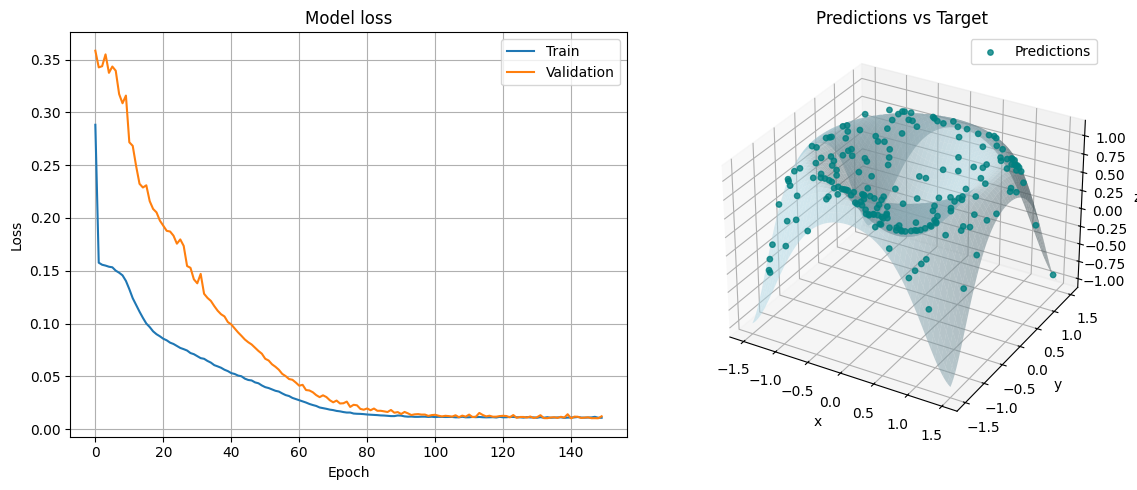

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(20, activation='tanh', input_shape=(2,)))  # primo layer
model.add(Dense(15, activation='tanh'))   # hidden layer
model.add(Dense(10, activation='tanh'))   # hidden layer
model.add(Dense(1))                       # output layer

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse']) #usa stochastic gradient descent come optimizer e mean square error come cost function
# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
          batch_size=32, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
         validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# ------------------------------------------------------------
# GENERO PUNTI DI TEST PER FARE LE PREDIZIONI
# ------------------------------------------------------------
x_predicted = np.random.uniform(-1.5, 1.5, 200)
y_predicted = np.random.uniform(-1.5, 1.5, 200)

xy_predicted = np.column_stack((x_predicted, y_predicted))

z_predicted = model.predict(xy_predicted).flatten()

# ------------------------------------------------------------
# GRAFICI
# ------------------------------------------------------------
fig = plt.figure(figsize=(12,5))

# --- Primo grafico: history ---
ax1 = fig.add_subplot(121)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'])
ax1.grid(True)

# --- Secondo grafico: 3D predictions ---
ax2 = fig.add_subplot(122, projection='3d')

# griglia per superficie target
X = np.linspace(-1.5, 1.5, 200)
Y = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X**2 + Y**2)

# superficie target
ax2.plot_surface(X, Y, Z, color='lightblue', edgecolor='none', alpha=0.5)

# predizioni
ax2.scatter(x_predicted, y_predicted, z_predicted,
            color='teal', s=15, alpha=0.8, label='Predictions')

ax2.set_title('Predictions vs Target')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.legend()

plt.tight_layout()
plt.show()


Il modello riceve in ingresso una coppia di variabili $(x,y)$ ed è costituito da una rete completamente connessa con più layer densi. In particolare, l’architettura include un primo layer denso con 20 neuroni e funzione di attivazione tangente iperbolica (tanh), che riceve un input bidimensionale (input_shape = (2,)). Seguono due hidden layer aggiuntivi con rispettivamente 15 e 10 neuroni, entrambi con funzione di attivazione tanh. Il layer di output è composto da un singolo neurone con attivazione lineare, che restituisce il valore scalare $z$.

Il modello è stato compilato utilizzando
- ottimizzatore: Adam
- funzione di costo: Mean Squared Error (MSE), utilizzata anche come metrica di valutazione.

L’addestramento del modello è stato effettuato utilizzando un dataset di training $(x_{train},y_{train},z_{train})$ e un dataset di validazione. Le variabili di input sono state fornite al modello come vettori bidimensionali. Il modello è stato allenato per $150$ epoche con batch size pari a $32$. I dati di training sono stati mescolati (shuffle) a ogni epoca per migliorare la stabilità dell’apprendimento. Durante il training sono stati monitorati l’andamento della loss sul training set e sul validation set. Al termine dell’addestramento, il modello è stato valutato sul dataset di validazione utilizzando la Mean Squared Error come metrica. Le prestazioni sono state analizzate sia in termini numerici, tramite la loss, sia confrontando graficamente le predizioni del modello con la superficie target teorica.


L’andamento della funzione di perdita in funzione delle epoche mostra una buona convergenza del modello. L’uso di una rete neurale più profonda, con attivazioni tanh e ottimizzatore Adam, consente di approssimare efficacemente una funzione non lineare bidimensionale. Il modello mostra una buona capacità di generalizzazione e una rappresentazione accurata della superficie target anche in presenza di rumore nei dati.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>